## Set básico de configurações

In [1]:
import pandas as pd
import numpy as np
import random
import sklearn.decomposition
import sklearn.feature_extraction
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('PesquisaCI_124_Limpa.xlsx')
df.head()

,Idade,Gênero,Categoria do cargo,Sigla da sua unidade,Comunicado Sabesp,Email matinal com as principais informações divulgadas no dia anterior no Workplace,Página da Unidade no Portal Sabesp,Portal Corporativo Sabesp,TV Corporativa,Workplace,...,Minha chefia utilizar a ferramenta,"Ter acesso a ferramentas de reunião, gestão do conhecimento ou compartilhamento de arquivos","Ter informação organizada de acordo com a estrutura corporativa, como no portal",Se mais colegas usassem,"Pensando no seu líder imediato, avalie seu grau de satisfação em relação ao repasse das informações de caráter interno (informações corporativas, RH, institucionais, projetos e programas etc.)","De forma geral, qual é o seu nível de satisfação com a Comunicação Interna Sabesp em uma escala de 1 a 5, onde 1 é muito insatisfeito e 5 é muito satisfeito.",Comente sua resposta,"Como você avalia a quantidade de informação disponibilizada nos veículos de Comunicação Interna (Conexão Sabesp no Workplace, Portal Corporativo, TV Corporativa, Comunicados Sabesp)?",Outro (especifique).1,Você tem alguma sugestão específica para melhorar a comunicação interna nos próximos meses?
0,Entre 41 e 50 anos,Feminino,Universitário,M,4,6,3,5,1,2,...,NaN,NaN,NaN,NaN,Excelente,3.0,NaN,Pouca. Não fico sabendo de tudo que gostaria.,NaN,NaN
1,Entre 51 e 60 anos,Masculino,Operacional,osmi,4,1,6,3,2,5,...,NaN,"Ter acesso a ferramentas de reunião, gestão do...",NaN,NaN,Excelente,5.0,NaN,Ideal,NaN,NaN
2,Entre 41 e 50 anos,Masculino,Operacional,OTDN,3,4,5,2,1,6,...,NaN,NaN,NaN,NaN,Excelente,4.0,NaN,Ideal,NaN,NaN
3,Entre 41 e 50 anos,Masculino,Gestão/liderança,OGGA,4,6,2,3,1,5,...,NaN,NaN,Ter informação organizada de acordo com a estr...,Se mais colegas usassem,Excelente,5.0,NaN,Ideal,NaN,NaN
4,Entre 51 e 60 anos,Masculino,Técnico/administrativo,OOSB,2,3,4,5,1,6,...,NaN,NaN,NaN,NaN,Boa,5.0,ND,Ideal,NaN,ND


In [3]:
# paleta de cores definidas pelo catálogo de identidade visual da marca de 50 anos
# definir paleta de cores em HEX
cores_hex = [
    "#12D0FF", "#01AAFF",  # Azuis
    "#FFC601", "#FF8A01",  # Laranjas
    "#FAB180", "#FF8A01",  # Tons de pele
    "#129180", "#12A101",  # Verdes
    "#FFFFFF", "#127001"   # Branco e Verde escuro
]

# Definir a paleta usando o seaborn
sns.set_palette(sns.color_palette(cores_hex))

### Descrição da Base

In [4]:
# verificar o shape da base (pesquisa)
df.shape

(2183, 34)

São 2183 linhas, correspondentes ao número de respondentes da pesquisa. <br>
São 34 colunas, correspondentes a perguntas OU especificações das perguntas (itens, respostas vinculadas etc.)

In [5]:
# criar uma lista com os rótulos das colunas
colums_list = df.columns.tolist()

In [6]:
# enumerar as colunas a um índice
for i, col in enumerate(colums_list):
    if i == 4:
        break
    print(f'{i}: {col}')
    

0: Idade
1: Gênero
2: Categoria do cargo
3: Sigla da sua unidade


**Perguntas 1 a 4** <br>

Dizem respeito a elementos que descrevem o respondente da pesquisa.

* colunas 0 a 3: tipo str, categóricas, com rol previamente definidos. 
* colunas 4: é do tipo str, não categórica, limitada a 4 dígitos, e identificam a unidade de trabalho. 


In [7]:
# enumerar as colunas a um índice
for i, col in enumerate(colums_list):
    if i <= 3:
        continue
    elif i == 10:
        break 
    print(f'{i}: {col}')

4: Comunicado Sabesp
5: Email matinal com as principais informações divulgadas no dia anterior no Workplace
6: Página da Unidade no Portal Sabesp
7: Portal Corporativo Sabesp
8: TV Corporativa
9: Workplace


**Pergunta 5** <br>

As colunas de 4 a 9 são itens da pergunta 4, com o enunciado:  <br>
"Qual meio de comunicação contribui melhor para você se sentir mais informado. Ordene de 1 a 6, onde 1 é menos eficaz e 6 é o meio mais eficaz"

Tratam-se de respostas rankeadas, com índice único e gradação obrigatória entre 1 e 6. <br>
dtype: int


In [8]:
# enumerar as colunas a um índice
for i, col in enumerate(colums_list):
    if i <= 9:
        continue
    elif i == 18:
        break 
    print(f'{i}: {col}')

10: Você utiliza o Portal Corporativo?
11: Qual é o principal motivo que o faz utilizar o Portal Corporativo?
12: Você utiliza a página da sua Unidade no Portal Corporativo?
13: Tenho acesso aos sistemas do meu departamento
14: Vejo notícias específicas da minha área
15: Tenho um repositório de documentos ordenados como relatórios, atas, tabelas.
16: Tem informações da minha área que são úteis não só para mim como para todos da cia
17: Outro (especifique)


**Perguntas 6 a 9** <br>

São quatro perguntas relacionadas ao portal corporativo, a primeira é a coluna 10 de caráter geral e categórico verifica se o usuário usa ou não a plataforma. A segunda (coluna 11) é condicionada a resposta positiva da anterior (sim) e tem resposta do tipo aberta para esclarecer os motivos. <br>


A terceira é a coluna 12 e especifica o uso de uma ferramenta específica do portal, a página da unidade. As colunas 13 a 17 fazem parte da quarta pergunta, condicionada a resposta afirmativa da anterior, e especificam em um rol quais os usos que a pessoa faz da ferramenta, deixando uma opção de preenchimento aberto ao final. <br>

* coluna 10: str, categórica: sim ou não
* colunna 11: str, aberta. 
* coluna 12: str, cateórica: sim ou não
* colunas 13 a 16: str, valem apenas como contagem, o significado é definido no rótulo. 
* coluna 17: str, aberta. 



In [9]:
# enumerar as colunas a um índice
for i, col in enumerate(colums_list):
    if i <= 17:
        continue
    elif i == 30:
        break 
    print(f'{i}: {col}')

18: Você utiliza o Workplace?
19: Mais incentivo da chefia
20: Conhecer melhor a ferramenta e entender o potencial do Workplace
21: Não tenho interesse em utilizar a ferramenta
22: Poderia incluir banco de dados, links e sistemas de uso da minha área
23: Poderia incluir links/acessos e sistemas de uso geral como Biblioteca, UES, Reembolso, Hollerith
24: Minha chefia utilizar a ferramenta
25: Ter acesso a ferramentas de reunião, gestão do conhecimento ou compartilhamento de arquivos
26: Ter informação organizada de acordo com a estrutura corporativa, como no portal
27: Se mais colegas usassem
28: Pensando no seu líder imediato, avalie seu grau de satisfação em relação ao repasse das informações de caráter interno (informações corporativas, RH, institucionais, projetos e programas etc.)
29: De forma geral, qual é o seu nível de satisfação com a Comunicação Interna Sabesp em uma escala de 1 a 5, onde 1 é muito insatisfeito e 5 é muito satisfeito.


**Perguntas 10 e 11** <br>

São perguntas relacionadas ao uso do Workplace (rede social interna). A primeira (coluna 18) é categórica (sim ou não) sobre o uso da plataforma. Em caso afirmativo, o usuário responde a uma segunda pergunta: <br>
"O que faria você aumentar a utilização? (escolha quantas forem verdadeiras)".

A partir desse momento é apresentado um rol de opções (coulnas 19 a 29), onde o importante é a contagem e a explicação do item está no próprio rótulo. 

* Coluna 18: str, categórico: sim ou não
* Colunas 19 a 29: str, valem apenas como contagem

In [10]:
# enumerar as colunas a um índice
for i, col in enumerate(colums_list):
    if i <= 27:
        continue
    elif i == 40:
        break 
    print(f'{i}: {col}')

28: Pensando no seu líder imediato, avalie seu grau de satisfação em relação ao repasse das informações de caráter interno (informações corporativas, RH, institucionais, projetos e programas etc.)
29: De forma geral, qual é o seu nível de satisfação com a Comunicação Interna Sabesp em uma escala de 1 a 5, onde 1 é muito insatisfeito e 5 é muito satisfeito.
30: Comente sua resposta
31: Como você avalia a quantidade de informação disponibilizada nos veículos de Comunicação Interna (Conexão Sabesp no Workplace, Portal Corporativo, TV Corporativa, Comunicados Sabesp)?
32: Outro (especifique).1
33: Você tem alguma sugestão específica para melhorar a comunicação interna nos próximos meses?


**Perguntas 12 a 15**<br>

Rol de perguntas gerais sobre satisfação do usuário com a comunicação interna. A pergunta 12 (coluna 28) fala sobre a comunicação da liderança, a pergunta 13 (colunas 29 e 30) pergunta sobre a satisfação de maneira geral e convida (não obrigatória) a comentar a resposta. A pergunta 14 (coluna 31 e 32) possuem a mesma lógica da anterior e reflete sobre a quantidade de informação disponibilizada. Enquanto a pergunta 15 (coluna 33) é aberta e solicita sugestões de melhoria. 
<br>

* 28: str, categórica com rol previamente definido
* 29: int, de 1 a 5
* 30: str, resposta aberta (opcional) vinculada a anterior
* 31: str, categórica com rol previamente definido
* 32: str, resposta aberta (opcional) vinculada a anterior
* 33: str, resposta aberta (opcional)

In [11]:
# Obter informações sobre os data types
types_df = df.dtypes
# Obter os valores nulos de cada coluna
soma_nulos = df.isnull().sum()

In [12]:
# laço para coletar a coluna e o tipo de dado e exibir valores nulos somados

for col, t in types_df.items():
    indice = df.columns.get_loc(col) # coletar o indice de coluna para não exibir o nome (que é grande)
    if soma_nulos[col] == 0:
        continue
    print(f'indice: {indice}, dtype: {t}, soma de nulos: {soma_nulos[col]}')



indice: 11, dtype: object, soma de nulos: 172
indice: 12, dtype: object, soma de nulos: 172
indice: 13, dtype: object, soma de nulos: 1264
indice: 14, dtype: object, soma de nulos: 1480
indice: 15, dtype: object, soma de nulos: 1873
indice: 16, dtype: object, soma de nulos: 1281
indice: 17, dtype: object, soma de nulos: 2081
indice: 18, dtype: object, soma de nulos: 38
indice: 19, dtype: object, soma de nulos: 1983
indice: 20, dtype: object, soma de nulos: 1580
indice: 21, dtype: object, soma de nulos: 2136
indice: 22, dtype: object, soma de nulos: 1559
indice: 23, dtype: object, soma de nulos: 1398
indice: 24, dtype: object, soma de nulos: 2047
indice: 25, dtype: object, soma de nulos: 1550
indice: 26, dtype: object, soma de nulos: 1277
indice: 27, dtype: object, soma de nulos: 1908
indice: 28, dtype: object, soma de nulos: 78
indice: 29, dtype: float64, soma de nulos: 78
indice: 30, dtype: object, soma de nulos: 1293
indice: 31, dtype: object, soma de nulos: 78
indice: 32, dtype: obj

**Ocorrência de nulos**<br>

* 11 e 12: são os usuários que responderam não a pergunta 10 e por isso não podem responder a 11 e a 12
* 13 a 17: são perguntas relacionadas a contagem de justificativas para a pergunta 12, naturalmente terá variação
* &#x1F3AF; **18**: são pessoas que desistiram de completar a pesquisa -> **linhas precisam ser retiradas da amostra**
* 19 a 27: mesmo caso do 13 a 17, mas relacionado a pergunta 18
* &#x1F3AF; **28 e 31**: são outras 40 pessoas que desistiram de terminar a pesquisa ->  **linhas precisam ser retiradas da amostra**
* 30, 32 e 33: respostas não obrigatórias


## Limpeza dos dados

In [13]:
ls_shape = []
ls_shape.append(df.shape[0])

# retirar os valores nulos resultantes de desistências
df = df.dropna(subset=[df.columns[28]])
# verificar se foram retirados 78 itens
ls_shape.append(df.shape[0])
print(ls_shape[0] - ls_shape[1])

78


In [14]:
# checar rapidamente valores nulos das colunas restantes
# coluna de indice 18 precisa ser igual a de indice 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2182
Data columns (total 34 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                            --------------  -----  
 0   Idade                                                                                                                                                                                             2105 non-null   object 
 1   Gênero                                                                                                                                                                                            2105 non-null   object 
 2   C

### Refinamento da nomenclatura de unidades

Essa é uma parte relativamente sensível da limpeza dos dados. <br>
A empresa passou por um processo recente de reestruturação que modificou os nomes e as siglas, no entanto, essas mudanças levam tempo. <br>

Será necessário fazer um de -> para da nomenclatura antiga para a atual, além de corrigir equívocos ou erros intencionais do usuário. 

In [15]:
# verificar valores unicos para unidades
df1 = df.copy()
df1['Sigla da sua unidade'] = df1['Sigla da sua unidade'].str.lower().str.strip()
df1['Sigla da sua unidade'].nunique()

535

In [16]:
# verificar novamente valores nulos
df1.iloc[:, 0:4].isnull().sum()

Idade                   0
Gênero                  0
Categoria do cargo      0
Sigla da sua unidade    2
dtype: int64

In [17]:
# verificar se havia linha com um espaço em branco ou não strings como resposta
# Localizar as linhas com valores nulos na coluna 'Sigla da sua unidade'
linhas_com_nulos = df[df1['Sigla da sua unidade'].isnull()]

# Exibir as linhas encontradas
print(linhas_com_nulos.iloc[:, 0:4])

                   Idade    Gênero Categoria do cargo Sigla da sua unidade
1255  Entre 18 e 30 anos  Feminino           Aprendiz                  409
1339  Entre 18 e 30 anos  Feminino           Aprendiz                  781


In [18]:
# excluir linhas 1255 e 1339 por entradas inválidas 
# Dropar as linhas onde 'Sigla da sua unidade' tem valores nulos
df1 = df1.dropna(subset=['Sigla da sua unidade'])

O número de 566 unidades é relativamente grande, pode ser o caso da granularidade entre diretoria, superintendência, departamento e divisão. Vamos trabalhar com as duas primeiras letras para entender o nível de superintendência. 

In [19]:
# fazer o slice e gerar uma nova coluna para ele chamada superintendencia
df1['superintendencia'] = df1['Sigla da sua unidade'].str.slice(0,2)
df1['superintendencia'].nunique() # verificar valores unicos para a superintendencia

94

In [20]:
# lista da coluna pela superintendência
sup = df1['superintendencia'].tolist()



def contar_ocorrencias_letra(sup, letra):
    """
    Função para contar ocorrências de unidades de superintendência que começam com uma letra específica.

    Argumentos:
    sup (list): Lista de unidades de superintendência existentes.
    letra (str): letras iniciais (máx 2) pela qual as ocorrências serão contadas.

    Retorna:
    int: O número de ocorrências de unidades de superintendência que começam com a letra especificada.
    """
    contador = 0  # inicializa o contador
    for k in sup:
        if isinstance(k, str) and k.startswith(letra):
            contador += 1  # incrementa o contador se a condição for atendida
    return contador

In [21]:
# chamar função para área desejada, use minúsculas
contar_ocorrencias_letra(sup, 'to')

64

A diretoria operacional (antiga R e M) são casos com maior número de alterações. <br>
Iniciar o processo pela conversão

In [22]:
mapeamento_MR = {
    'ma':'oa',
    'mt':'oe',
    'mm':'og',
    'mc':'oc',
    'mo':'oo',
    'ml':'ol',
    'mn':'on',
    'ms':'os',
    'rs':'ox',
    'rr':'or',
    'rn':'oi',
    'rv':'ov',
    'ra':'op',
    'rj':'oj',
    'rg':'of',
    'rt':'ot',
    'rb':'ou',
    'rm':'om',
    'r':'o',
    'm':'o',
    ' m':'o',
    ' r':'o',
    'r ':'o',
    'm ':'o'
}

In [23]:
def redefinir_sup(mapeamento):
    # subistituir os valores com base no mapeamento
    df1['superintendencia'] = df1['superintendencia'].replace(mapeamento)
    # verificar os valores unicos novamente
    df1['superintendencia'].nunique()
    

In [24]:
redefinir_sup(mapeamento_MR)

In [25]:
# atualizar lista de superintendencias
sup =  df1['superintendencia'].tolist()
diretorias = ['p', 'n', 'm', 'r', 'o', 'k', 'f', 'c', 't', 'e']

# coletar sets de siglas das diretorias
for s in sup: 
    p = set([s for s in sup if s.startswith('p')])
    n = set([s for s in sup if s.startswith('n')])
    m = set([s for s in sup if s.startswith('m')])
    r = set([s for s in sup if s.startswith('r')])
    o = set([s for s in sup if s.startswith('o')])
    k = set([s for s in sup if s.startswith('k')])
    f = set([s for s in sup if s.startswith('f')])
    c = set([s for s in sup if s.startswith('c')])
    t = set([s for s in sup if s.startswith('t')])
    e = set([s for s in sup if s.startswith('e')])        


In [26]:
print(p,'\n', n,'\n', m,'\n', r,'\n', o,'\n', k,'\n', f,'\n', c,'\n', t,'\n', e)

{'p1', 'pa', 'pc', 'pp', 'pi', 'p', 'ps', 'pd', 'pn'} 
 {'nr', 'nn', 'nc', 'n'} 
 {'mb'} 
 {'ro'} 
 {'om', 'of', 'o', 'ou', 'og', 'ol', 'ox', 'oc', 'os', 'oo', 'op', 'or', 'oi', 'ov', 'oe', 'oj', 'on', 'oa', 'ot', 'od'} 
 {'ki', 'k', 'ke', 'kf'} 
 {'f', 'fc', 'fi', 'fs', 'f/', 'ft', 'fx', 'ff'} 
 {'ch', 'cl', 'cg', 'cs', 'ck', 'co', 'c'} 
 {'tx', 'ti', 'to', 'tg', 'te', 't'} 
 {'eo', 'eg', 'ep', 'er', 'ea', 'e', 'ei', 'em'}


In [27]:
mapeamento_MR = {'t':'e', 'tg':'em', 'to':'eo', 'ti':'er', 'tx':'ei', 'te':'ep'}
redefinir_sup(mapeamento_MR)

In [28]:
# função para verificar superintendências
def verificar_sup(sigla):
    linhas_verificáveis = df1[df1['superintendencia'] == sigla]
    print(linhas_verificáveis.iloc[:, 0:4])


In [29]:
verificar_sup('oo')

                   Idade     Gênero      Categoria do cargo  \
4     Entre 51 e 60 anos  Masculino  Técnico/administrativo   
14    Entre 51 e 60 anos  Masculino  Técnico/administrativo   
19    Entre 51 e 60 anos   Feminino  Técnico/administrativo   
32    Entre 51 e 60 anos  Masculino             Operacional   
45    Entre 51 e 60 anos  Masculino             Operacional   
...                  ...        ...                     ...   
2028  Entre 51 e 60 anos  Masculino           Universitário   
2040  Entre 51 e 60 anos  Masculino           Universitário   
2082  Entre 61 e 70 anos  Masculino  Técnico/administrativo   
2167  Entre 41 e 50 anos   Feminino  Técnico/administrativo   
2175  Entre 51 e 60 anos   Feminino           Universitário   

     Sigla da sua unidade  
4                    oosb  
14                    oom  
19                   oost  
32                   oomt  
45                   oomb  
...                   ...  
2028                 moee  
2040               

In [30]:
verificar_sup('ro')

                   Idade     Gênero      Categoria do cargo  \
285   Entre 51 e 60 anos  Masculino             Operacional   
948   Entre 61 e 70 anos  Masculino  Técnico/administrativo   
2137  Entre 51 e 60 anos  Masculino             Operacional   

     Sigla da sua unidade  
285                  romi  
948                    ro  
2137                   ro  


In [31]:
mapeamento_MR = {'mb':'o', 'ro':'od', 'f/':'f'}
# subistituir os valores com base no mapeamento
redefinir_sup(mapeamento_MR)

In [32]:
# Conjunto para armazenar a primeira letra de cada sigla
primeiras_letras = set()

# Loop sobre cada sigla na lista
for sigla in sup:
    # Adiciona a primeira letra da sigla ao conjunto
    primeiras_letras.add(sigla[0])

# Exibe o conjunto resultante
print(primeiras_letras - set(diretorias))

{'g', '0', 'a', 's', 'u'}


In [33]:
print(contar_ocorrencias_letra(sup, 's'),
      contar_ocorrencias_letra(sup, 'a'),
      contar_ocorrencias_letra(sup, 'g'),
      contar_ocorrencias_letra(sup, '0'),
      contar_ocorrencias_letra(sup, 'u'))

3 3 2 3 1


In [34]:
def filtrar_letra(coluna, letra):
    # Filtrar o DataFrame para as linhas onde a coluna "superintendencia" começa com a letra especificada
    linhas_filtradas = df1[df1[coluna].str.startswith(letra)]
    
    # Mostrar as 4 primeiras colunas dessas linhas
    return linhas_filtradas.iloc[:, :4]

In [35]:
filtrar_letra('superintendencia', 's')

,Idade,Gênero,Categoria do cargo,Sigla da sua unidade
737,Entre 61 e 70 anos,Masculino,Técnico/administrativo,sac
1635,Entre 51 e 60 anos,Feminino,Gestão/liderança,sac
1691,Entre 51 e 60 anos,Masculino,Operacional,sac


In [36]:
filtrar_letra('superintendencia', 'a')

,Idade,Gênero,Categoria do cargo,Sigla da sua unidade
538,Entre 41 e 50 anos,Masculino,Técnico/administrativo,aotg
860,Entre 51 e 60 anos,Masculino,Gestão/liderança,aotg
1999,Entre 51 e 60 anos,Feminino,Técnico/administrativo,adm.


In [37]:
filtrar_letra('superintendencia', 'g')

,Idade,Gênero,Categoria do cargo,Sigla da sua unidade
1631,Entre 51 e 60 anos,Masculino,Operacional,ggol
2039,Entre 51 e 60 anos,Masculino,Técnico/administrativo,glg


In [38]:
filtrar_letra('superintendencia', 'u')

,Idade,Gênero,Categoria do cargo,Sigla da sua unidade
1269,Entre 51 e 60 anos,Masculino,Gestão/liderança,ufms


In [39]:
filtrar_letra('superintendencia', '0')

,Idade,Gênero,Categoria do cargo,Sigla da sua unidade
792,Entre 41 e 50 anos,Feminino,Técnico/administrativo,00
1065,Entre 41 e 50 anos,Masculino,Operacional,0i
1406,Entre 31 e 40 anos,Masculino,Universitário,000


In [40]:
# dropar linhas pelo indice
df1 = df1.drop([538, 792, 860, 1065, 1269, 1406, 1631, 1999, 2039])

In [41]:
mapeamento_MR = {'sa':'k'}
redefinir_sup(mapeamento_MR)

In [42]:
# fazer o slice e gerar uma nova coluna para ele chamada diretoria
df1['diretoria'] = df1['superintendencia'].str.slice(0,1)
df1['diretoria'].nunique() # verificar valores unicos para a superintendencia

7

In [43]:
df1.diretoria.value_counts()

diretoria
o    1507
e     165
f     141
c     126
p      74
k      69
n      12
Name: count, dtype: int64

In [44]:
# verificar dados gerais
df1.describe()

,Comunicado Sabesp,Email matinal com as principais informações divulgadas no dia anterior no Workplace,Página da Unidade no Portal Sabesp,Portal Corporativo Sabesp,TV Corporativa,Workplace,"De forma geral, qual é o seu nível de satisfação com a Comunicação Interna Sabesp em uma escala de 1 a 5, onde 1 é muito insatisfeito e 5 é muito satisfeito."
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,3.787966,3.775549,3.348615,3.719198,2.696275,3.672397,3.697230
std,1.647343,1.775034,1.412779,1.393262,2.117751,1.541164,0.967717
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,1.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,6.000000,6.000000,8.000000,6.000000,6.000000,6.000000,5.000000


Há problemas relacionados as colunnas:
* página da unidade no portal, com valores abaixo do min e acima do max
* tv corporativa, valores abaixo do mínimo

In [45]:
print(df1['Página da Unidade no Portal Sabesp'].value_counts(), df1['TV Corporativa'].value_counts())

Página da Unidade no Portal Sabesp
2    542
3    442
4    417
5    390
1    166
6    135
0      1
8      1
Name: count, dtype: int64 TV Corporativa
1    1101
6     494
2     206
5     111
3     110
4      71
0       1
Name: count, dtype: int64


In [46]:
# alterar valores 0 -> 1 e valores 8 -> 6
troca_valores = {8:6, 0:1}
troca_valor = {0:1}
# subistituir os valores com base no mapeamento
df1['Página da Unidade no Portal Sabesp'] = df1['Página da Unidade no Portal Sabesp'].replace(troca_valores)
df1['TV Corporativa'] = df1['TV Corporativa'].replace(troca_valor)

In [47]:
print(df1['Página da Unidade no Portal Sabesp'].value_counts(), df1['TV Corporativa'].value_counts())

Página da Unidade no Portal Sabesp
2    542
3    442
4    417
5    390
1    167
6    136
Name: count, dtype: int64 TV Corporativa
1    1102
6     494
2     206
5     111
3     110
4      71
Name: count, dtype: int64


## Análise Descritiva

### Composição da amostra
Análise das características dos respondentes

In [77]:
# função para verificar porcentagens dos valores de colunas
def verificar_porcentagens(coluna):
    total = df1[coluna].value_counts().sum()
    contagem = df1[coluna].value_counts()
    
    for i, n in contagem.items():
        p = (n / total) * 100
        print(f'{i}: {p:.2f}%')


In [76]:
# renomear para usar minúscula
df1.rename(columns={'Idade': 'idade'}, inplace=True)
verificar_porcentagens('idade')

Entre 51 e 60 anos: 38.40%
Entre 41 e 50 anos: 31.66%
Entre 31 e 40 anos: 15.71%
Entre 61 e 70 anos: 9.22%
Entre 18 e 30 anos: 3.96%
Menor de 18 anos: 0.76%
Mais de 71 anos: 0.29%


Nota: para as análises de distribuição os valores relativos a menores de 18 e maiores 71 anos são desnecessários como filtro de observação

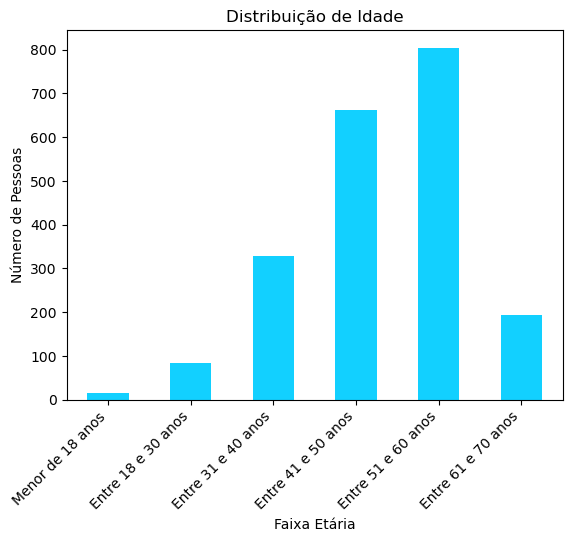

In [49]:
# plotar gráfico de idade
# Definindo os intervalos de idade
intervalos_idade = ['Menor de 18 anos', 'Entre 18 e 30 anos',
'Entre 31 e 40 anos',
'Entre 41 e 50 anos',
'Entre 51 e 60 anos',
'Entre 61 e 70 anos']
# Contando o número de ocorrências em cada intervalo de idade
contagem_idade = df1['idade'].value_counts().reindex(intervalos_idade)

# Plotando o gráfico de barras
contagem_idade.plot(kind='bar')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Idade')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

In [80]:
# renomear para usar minúscula
df1.rename(columns={'Gênero': 'genero'}, inplace=True)
# verificar valores para declaração de gênero
verificar_porcentagens('genero')
print()
print(df1.genero.value_counts())

Masculino: 71.63%
Feminino: 27.65%
Prefiro não responder: 0.57%
Outro. Qual?: 0.14%

genero
Masculino                1500
Feminino                  579
Prefiro não responder      12
Outro. Qual?                3
Name: count, dtype: int64


Ao final de 2023, nosso quadro de empregados era composto por 11.170 pessoas divididas nas categorias operacional, técnica, universitária e gerencial, levando‐se em conta o grau de escolaridade, experiência profissional, complexidade das atribuições e qualificação técnica. <br>

<span style="background-color: #6A5ACD"> Nossa força de trabalho é formada por 8.983 **homens (80,4%)** e 2.187 **mulheres (19,6%)**.</span> <br>

Os casos de outro e prefiro não responder não precisam ser considerados para análise

In [81]:
# renomear para usar minúscula
df1.rename(columns={'Categoria do cargo': 'cargo'}, inplace=True)
# verificar valores para o tipo de cargo
verificar_porcentagens('cargo')
df1.cargo.value_counts()

Técnico/administrativo: 39.59%
Universitário: 22.59%
Operacional: 20.58%
Gestão/liderança: 15.57%
Aprendiz: 1.67%


cargo
Técnico/administrativo    829
Universitário             473
Operacional               431
Gestão/liderança          326
Aprendiz                   35
Name: count, dtype: int64

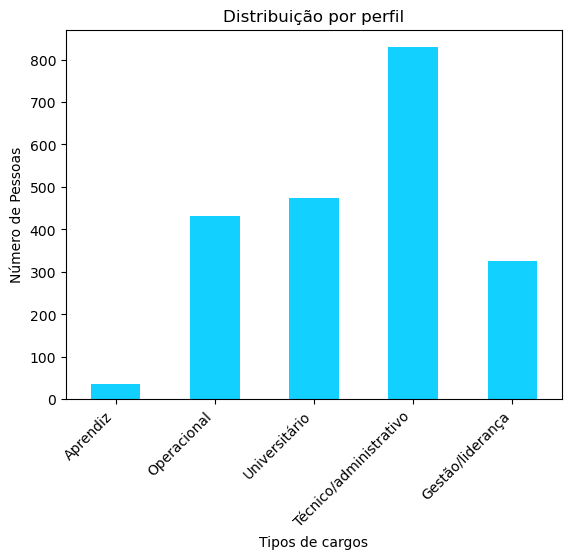

In [52]:
# plotar gráfico de tipo de cargo
# Definindo os intervalos de cargos
intervalos_cargos = ['Aprendiz', 'Operacional',
'Universitário',
'Técnico/administrativo',
'Gestão/liderança']
# Contando o número de ocorrências em cada intervalo de idade
contagem_cargos = df1['cargo'].value_counts().reindex(intervalos_cargos)

# Plotando o gráfico de barras
contagem_cargos.plot(kind='bar')
plt.xlabel('Tipos de cargos')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição por perfil')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

In [82]:
verificar_porcentagens('diretoria')

o: 71.97%
e: 7.88%
f: 6.73%
c: 6.02%
p: 3.53%
k: 3.30%
n: 0.57%


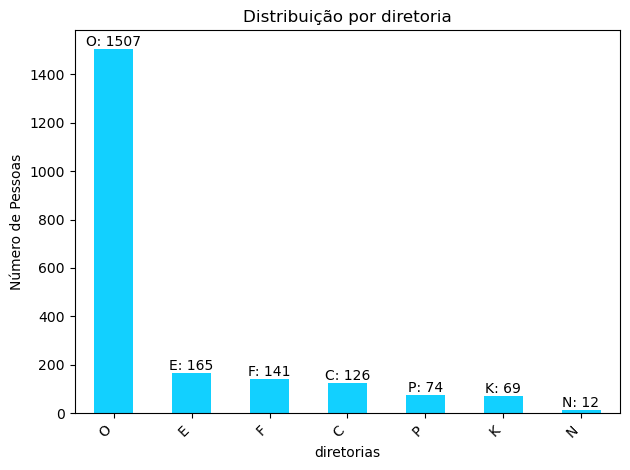

In [53]:
# plotar gráfico de diretorias
# Contando o número de ocorrências em cada intervalo
contagem_diretoria = df1['diretoria'].value_counts()
contagem_diretoria.index = contagem_diretoria.index.str.upper()

# Plotando o gráfico de barras
contagem_diretoria.plot(kind='bar')
plt.xlabel('diretorias')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição por diretoria')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Adicionando um quadro com as diretorias e a contagem de cada uma
for i, (diretoria, contagem) in enumerate(contagem_diretoria.items()):
    plt.text(i, contagem, f'{diretoria}: {contagem}', ha='center', va='bottom')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de texto
plt.show()

### Análise Descritiva 

In [118]:
for i, c in enumerate(df1.columns):
    print(i, c)

0 idade
1 genero
2 cargo
3 Sigla da sua unidade
4 comunicado_sabesp
5 email_matinal
6 pagina_un
7 portal
8 tv_corporativa
9 workplace
10 Você utiliza o Portal Corporativo?
11 Qual é o principal motivo que o faz utilizar o Portal Corporativo?
12 Você utiliza a página da sua Unidade no Portal Corporativo?
13 Tenho acesso aos sistemas do meu departamento
14 Vejo notícias específicas da minha área
15 Tenho um repositório de documentos ordenados como relatórios, atas, tabelas.
16 Tem informações da minha área que são úteis não só para mim como para todos da cia
17 Outro (especifique)
18 Você utiliza o Workplace?
19 Mais incentivo da chefia
20 Conhecer melhor a ferramenta e entender o potencial do Workplace
21 Não tenho interesse em utilizar a ferramenta
22 Poderia incluir banco de dados, links e sistemas de uso da minha área
23 Poderia incluir links/acessos e sistemas de uso geral como Biblioteca, UES, Reembolso, Hollerith
24 Minha chefia utilizar a ferramenta
25 Ter acesso a ferramentas de

In [98]:
# renomear colunas para facilitar manipulação
df1.rename(columns={'Comunicado Sabesp': 'comunicado_sabesp'}, inplace=True)
df1.rename(columns={'Email matinal com as principais informações divulgadas no dia anterior no Workplace': 'email_matinal'}, inplace=True)
df1.rename(columns={'Página da Unidade no Portal Sabesp': 'pagina_un'}, inplace=True)
df1.rename(columns={'Portal Corporativo Sabesp': 'portal'}, inplace=True)
df1.rename(columns={'TV Corporativa': 'tv_corporativa'}, inplace=True)
df1.rename(columns={'Workplace': 'workplace'}, inplace=True)
df1.rename(columns={'De forma geral, qual é o seu nível de satisfação com a Comunicação Interna Sabesp em uma escala de 1 a 5, onde 1 é muito insatisfeito e 5 é muito satisfeito.': 'nivel_satisfacao'}, inplace=True)

In [121]:
# criar um data frame exclusivo para colunas numéricas
indices_colunas1 = [4, 5, 6, 7, 8, 9] # colunas numéricas informadas pelo índice
indices_colunas2 = [4, 5, 6, 7, 8, 9, 29]
# Criar um novo DataFrame selecionando as colunas pelo índice
df_num1 = df1.iloc[:, indices_colunas1]
df_num2 = df1.iloc[:, indices_colunas2]

In [122]:
df_num2.describe()

,comunicado_sabesp,email_matinal,pagina_un,portal,tv_corporativa,workplace,nivel_satisfacao
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,3.787966,3.775549,3.348138,3.719198,2.696753,3.672397,3.697230
std,1.647343,1.775034,1.409342,1.393262,2.117255,1.541164,0.967717
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,1.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000


In [123]:
# exibição de média de preferência dos produtos (em ordem crescente)
df_num1.mean().sort_values(ascending=False).to_frame(name='Média')

,Média
comunicado_sabesp,3.787966
email_matinal,3.775549
portal,3.719198
workplace,3.672397
pagina_un,3.348138
tv_corporativa,2.696753


Apenas em comparação, a pesquisa anterior apontou: <br>

Comunicado Sabesp	5.017337<br>
E-mail matinal Workplace	4.973375<br>
<mark>Workplace	4.570898<br>
Portal Corporativo Sabesp	4.497214<br></mark>
Página da Unidade no Portal Sabesp	3.981424<br>
Jornal Mural	3.402477<br>
TV Corporativa	3.022291<br>





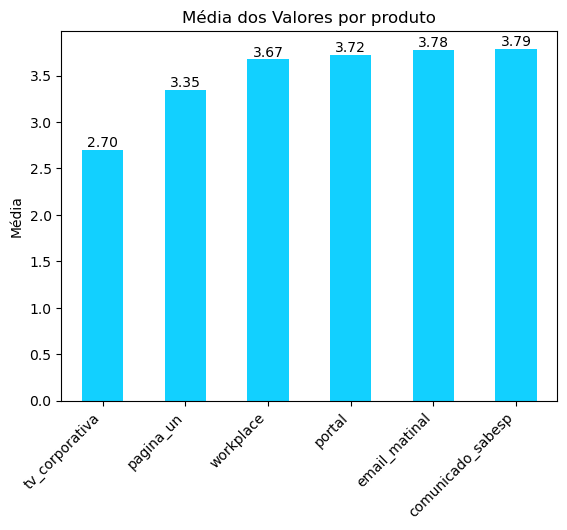

In [124]:
# Transformar os valores em um DataFrame para plotagem
df_mean = df_num1.mean().sort_values().to_frame(name='Média')

# Plotar um gráfico de barras
ax = df_mean.plot(kind='bar')
ax.set_ylabel('Média')
ax.set_title('Média dos Valores por produto')
ax.legend().remove()  # Para remover a legenda, se preferir
# modificar rótulos do eixo x para diagonal
plt.xticks(rotation=45, ha='right')

# Adicionar os rótulos de média dentro das barras
for i, v in enumerate(df_mean['Média']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='light')


# Mostrar o gráfico
plt.show()

#### Série de análise por diretoria

In [128]:
# incluir diretoria nos dataframes que serão utilizados
indices_colunas1 = [4, 5, 6, 7, 8, 9, 35] # colunas numéricas informadas pelo índice
indices_colunas2 = [4, 5, 6, 7, 8, 9, 29, 35] # colunas numéricas informadas pelo índice
# Criar um novo DataFrame selecionando as colunas pelo índice
df_num1 = df1.iloc[:, indices_colunas1]
df_num2 = df1.iloc[:, indices_colunas2]

In [134]:

# FUNÇÃO PARA GERAÇÃO DE GRÁFICOS DE DIRETORIA

def plot_boxplot(data, y_var, subtitle):

    """
    Gera um gráfico boxplot para uma variável especificada por diretoria e adiciona uma linha vermelha com a média.

    Parâmetros:
    data (DataFrame): DataFrame contendo os dados.
    y_var (str): Nome da coluna que será utilizada para o eixo y no boxplot.
    subtitle (str): Texto a ser exibido como subtítulo no gráfico."""

    
    # Definir a ordem de avaliação
    ordem_diretoria = ['O', 'C', 'E', 'F', 'P', 'K', 'N']
    
    # Gráfico boxplot para a variável especificada por diretoria
    comunicado = sns.catplot(x="diretoria", y=y_var,
                             data=data, kind="box",               
                             height=4.8, aspect=0.9)
    
    # Definição de ordem para o eixo x
    for ax in comunicado.axes.flat:
        ax.set_xticks(range(len(ordem_diretoria)))
        ax.set_xticklabels(ordem_diretoria)
    
    # Calcular a média da variável especificada
    media_y_var = data[y_var].mean()
    
    # Adicionar linha vermelha representando a média
    for ax in comunicado.axes.flat:
        ax.axhline(media_y_var, color='red', linestyle='--', linewidth=2, label=f'Média = {media_y_var:.2f}')
        ax.legend()
    
    # Adicionar título geral e subtítulo
    plt.figtext(0.05, 1.15, 'Canal Interno por Diretoria', fontsize=14, fontweight='bold', ha='left')
    plt.figtext(0.05, 1.10, subtitle, fontsize=12, fontweight='bold', color='gray', ha='left')
    
    plt.show()

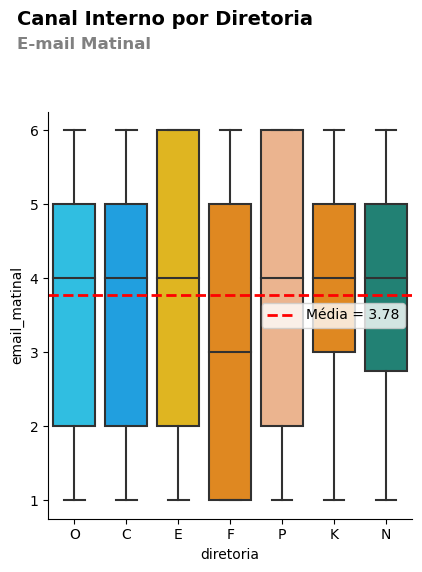

In [133]:
plot_boxplot(df_num1, "email_matinal", "E-mail Matinal")

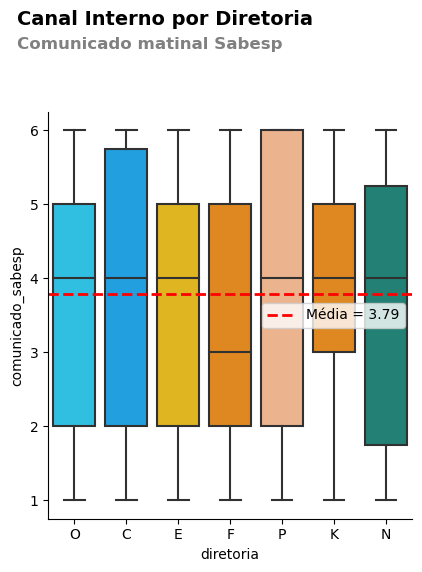

In [135]:
plot_boxplot(df_num1, "comunicado_sabesp", "Comunicado matinal Sabesp")

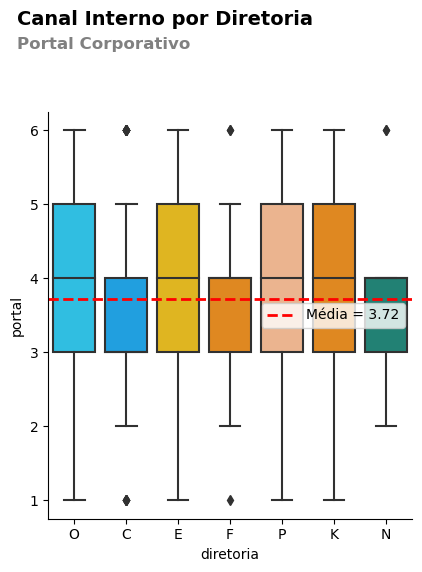

In [136]:
plot_boxplot(df_num1, "portal", "Portal Corporativo")

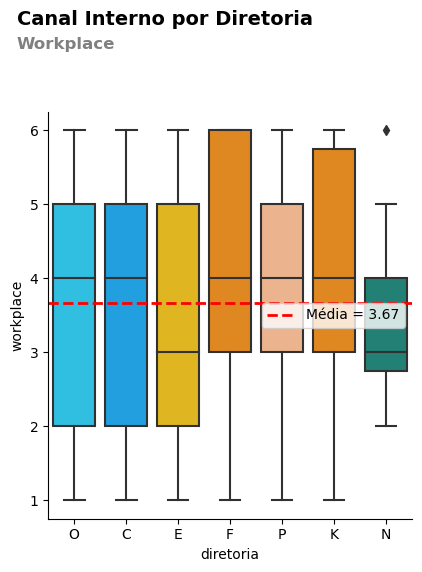

In [137]:
plot_boxplot(df_num1, "workplace", "Workplace")

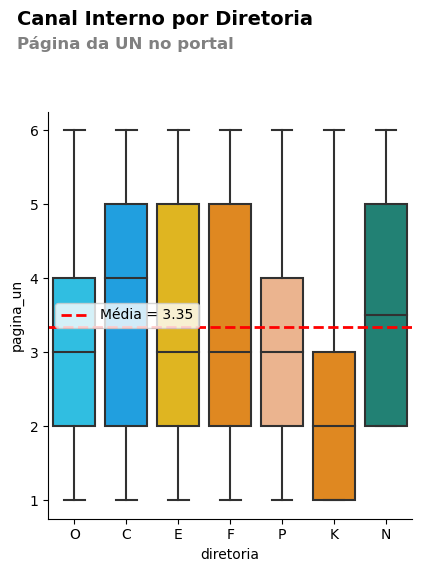

In [138]:
plot_boxplot(df_num1, "pagina_un", "Página da UN no portal")

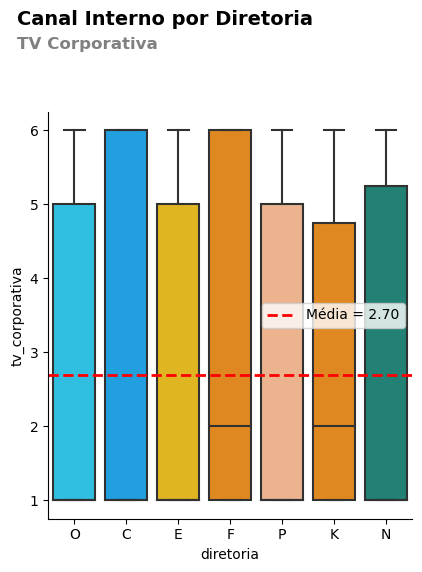

In [139]:
plot_boxplot(df_num1, "tv_corporativa", "TV Corporativa")

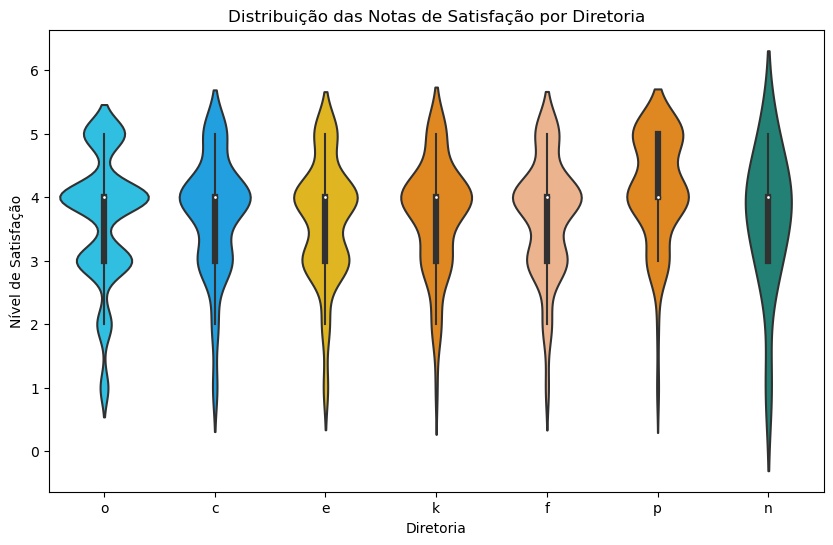

In [160]:
# Satisfação geral
# Gráfico de distribuição das notas por diretoria

# Criar o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x="diretoria", y="nivel_satisfacao", data=df_num2)

# Adicionar título e rótulos dos eixos
plt.title("Distribuição das Notas de Satisfação por Diretoria")
plt.xlabel("Diretoria")
plt.ylabel("Nível de Satisfação")

# Exibir o gráfico
plt.show()

In [169]:
df_num2.nivel_satisfacao.value_counts()

nivel_satisfacao
4    923
3    556
5    408
2    135
1     72
Name: count, dtype: int64

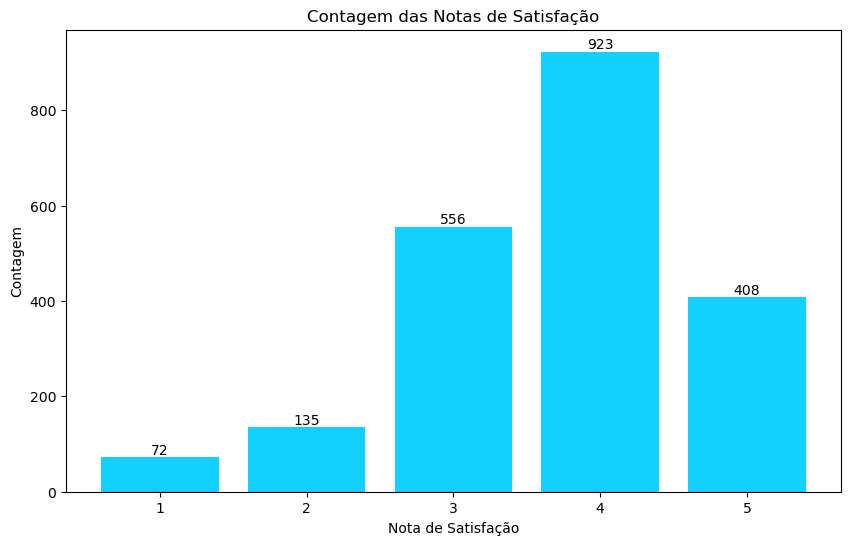

In [167]:
# Contagem dos valores únicos na coluna "nivel_satisfacao"
contagem_nivel_satisfacao = df_num2["nivel_satisfacao"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(contagem_nivel_satisfacao.index, contagem_nivel_satisfacao.values)

# Adicionar a contagem dentro de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Adicionar título e rótulos dos eixos
plt.title("Contagem das Notas de Satisfação")
plt.xlabel("Nota de Satisfação")
plt.ylabel("Contagem")

# Exibir o gráfico
plt.show()